# 🎬 Netflix Content Trends Analysis  
### *Uncovering Strategic Insights for Global Content Expansion (2008–2021)*

This project analyzes the **Netflix Dataset** (7,789 entries) to understand how content distribution—**Movies vs. TV Shows**, **genre popularity**, and **country contributions**—has evolved from **2008 to 2021**. The insights will support **strategic recommendations** for content acquisition, production, and international growth.

## 🎯 Problem Statement

> **"Content Trends Analysis for Strategic Recommendations"**  
> The goal is to uncover how Netflix’s content distribution—specifically **Movies vs. TV Shows**, **genres**, and **country contributions**—has evolved over the years (2008–2021). This will reveal audience preferences and inform strategic decisions about global content expansion.

### 🔍 Key Objectives:
1. **Track yearly trends** in Movies vs. TV Shows.
2. **Identify top and emerging genres**.
3. **Analyze country-wise content contributions**, especially non-U.S. markets.
4. **Provide actionable strategic recommendations** for Netflix.

## 🔧 Step 1: Import Libraries

We begin by importing essential Python libraries:
- `pandas` and `numpy` for data manipulation
- `matplotlib` and `seaborn` for visualization
- Standard settings for clean, readable plots

This foundational step ensures we can load, clean, and visualize the data effectively.

In [1]:
# Import data science and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Suppress non-critical warnings

# Set global plot style for consistency
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 📂 Step 2: Load the Netflix Dataset

We upload and inspect the `Netflix Dataset.csv` file.  
Based on your data, the actual columns are:

- `Show_Id`: Unique ID  
- `Category`: "Movie" or "TV Show"  
- `Title`: Content name  
- `Country`: Production country (may be multi-valued)  
- `Release_Date`: When content was **added to Netflix** (used as time proxy)  
- `Type`: Genres (e.g., "Dramas, International Movies")  
- `Description`: Plot summary  

> ✅ This step confirms the dataset is loaded correctly and reveals the true column names.

In [2]:
# Upload the dataset in Google Colab
from google.colab import files
uploaded = files.upload()

# Load CSV file
df = pd.read_csv('Netflix Dataset.csv')

# Display basic info
print("✅ Dataset loaded successfully!")
print(f"\nShape: {df.shape}")
print(f"\nColumns: {list(df.columns)}\n")

# Show first 5 rows to verify structure
df.head()

Saving Netflix Dataset.csv to Netflix Dataset.csv
✅ Dataset loaded successfully!

Shape: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']



,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## 🧹 Step 3: Data Cleaning & Feature Engineering

To enable time-based and categorical analysis, we:
1. Parse `Release_Date` (e.g., "August 14, 2020") into a datetime object and extract `year_added`.
2. Drop rows with missing years (critical for trend analysis).
3. Fill missing values in `Country` and `Type` with "Unknown".
4. Filter data to **2008–2021** as per the problem statement.

> 💡 Note: `Release_Date` reflects when content was **added to Netflix**, not original release year—perfect for tracking platform evolution.

In [3]:
# Create a working copy to avoid modifying original data
netflix = df.copy()

# Convert 'Release_Date' to datetime and extract year
netflix['Release_Date'] = pd.to_datetime(netflix['Release_Date'], errors='coerce')
netflix['year_added'] = netflix['Release_Date'].dt.year

# Remove rows with missing year (essential for time analysis)
netflix = netflix.dropna(subset=['year_added'])
netflix['year_added'] = netflix['year_added'].astype(int)

# Handle missing values in key categorical columns
netflix['Country'] = netflix['Country'].fillna('Unknown')
netflix['Type'] = netflix['Type'].fillna('Unknown')

# Restrict to years 2008–2021 (as specified in problem statement)
netflix = netflix[(netflix['year_added'] >= 2008) & (netflix['year_added'] <= 2021)]

# Final check
print(f"✅ Cleaned dataset shape: {netflix.shape}")
print(f"📅 Year range: {int(netflix['year_added'].min())} – {int(netflix['year_added'].max())}")

✅ Cleaned dataset shape: (7691, 12)
📅 Year range: 2008 – 2021


## 📈 Step 4: Analyze Movies vs. TV Shows Over Time

Using the `Category` column ("Movie" / "TV Show"), we track how Netflix’s content mix has shifted annually. This reveals:
- Whether TV Shows have grown faster than Movies
- Key inflection points (e.g., post-2015 surge in series)

> 🎯 This directly addresses the first objective: **format preference trends**.

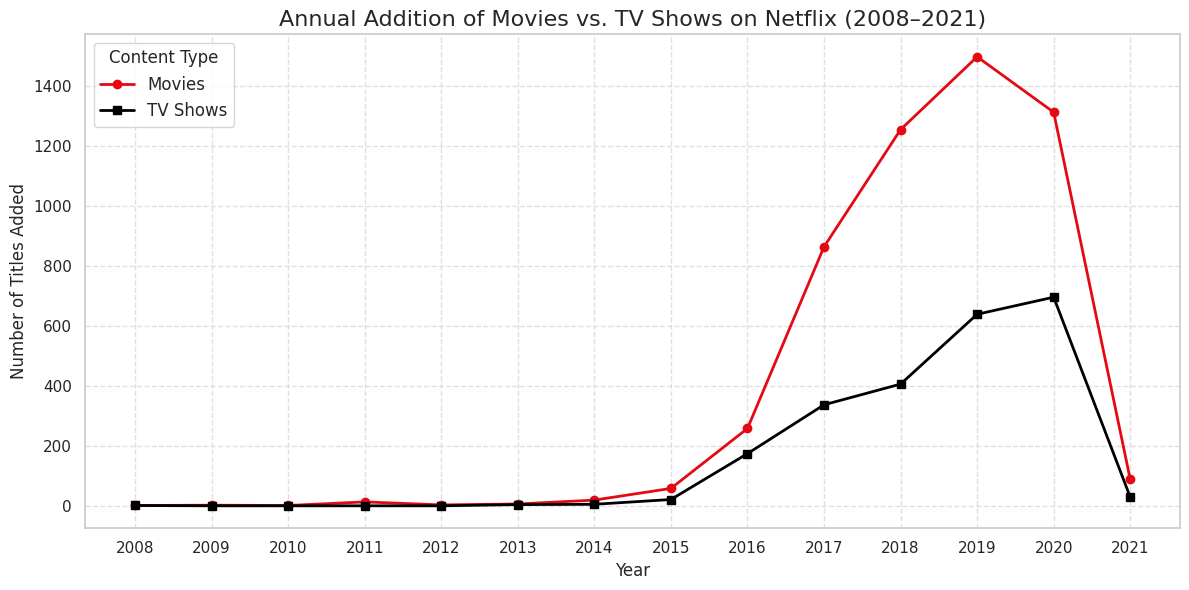

In [4]:
# Group by year and category
content_trend = netflix.groupby(['year_added', 'Category']).size().unstack(fill_value=0)

# Plot with Netflix-style colors
plt.figure(figsize=(12, 6))
plt.plot(content_trend.index, content_trend['Movie'],
         label='Movies', marker='o', linewidth=2, color='#E50914')  # Netflix red
plt.plot(content_trend.index, content_trend['TV Show'],
         label='TV Shows', marker='s', linewidth=2, color='#000000')  # Black

plt.title('Annual Addition of Movies vs. TV Shows on Netflix (2008–2021)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(content_trend.index)
plt.tight_layout()
plt.show()

## 🎭 Step 5: Genre Popularity Analysis

The `Type` column contains comma-separated genres (e.g., "Dramas, International Movies"). We:
1. Split each entry into individual genres
2. Count occurrences to identify **top 10 genres overall**

> 🎯 This fulfills the second objective: **identify dominant and emerging genres** to guide content strategy.

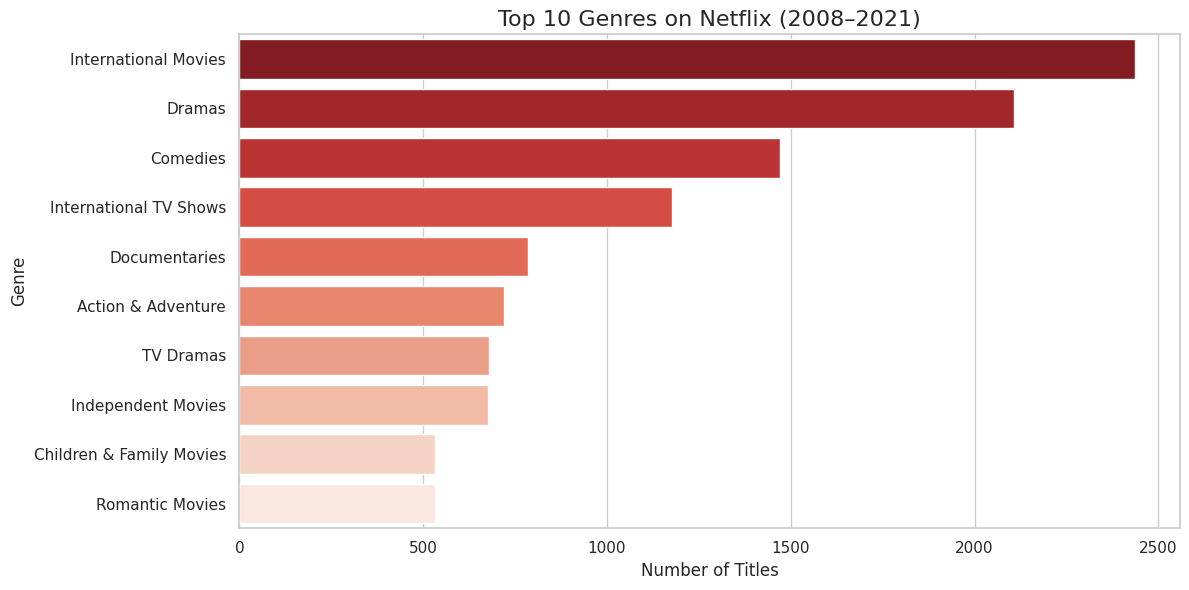

Top 5 Genres:
1. International Movies – 2437 titles
2. Dramas – 2108 titles
3. Comedies – 1472 titles
4. International TV Shows – 1176 titles
5. Documentaries – 786 titles


In [5]:
# Split genres into separate rows
netflix['genre_list'] = netflix['Type'].str.split(', ')
genre_df = netflix.explode('genre_list')
genre_df['genre_list'] = genre_df['genre_list'].str.strip()

# Get top 10 genres
top_genres = genre_df['genre_list'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Reds_r')
plt.title('Top 10 Genres on Netflix (2008–2021)', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Print top genres for clarity
print("Top 5 Genres:")
for i, (genre, count) in enumerate(top_genres.head().items(), 1):
    print(f"{i}. {genre} – {count} titles")

## 🌍 Step 6: Country-wise Content Analysis

The `Country` column may list multiple countries (e.g., "United States, India"). We:
1. Split entries into individual countries
2. Count total contributions per country
3. Highlight **global diversity** and **non-U.S. growth**

> 🎯 This addresses the third objective: **understand country contributions** to support international expansion.

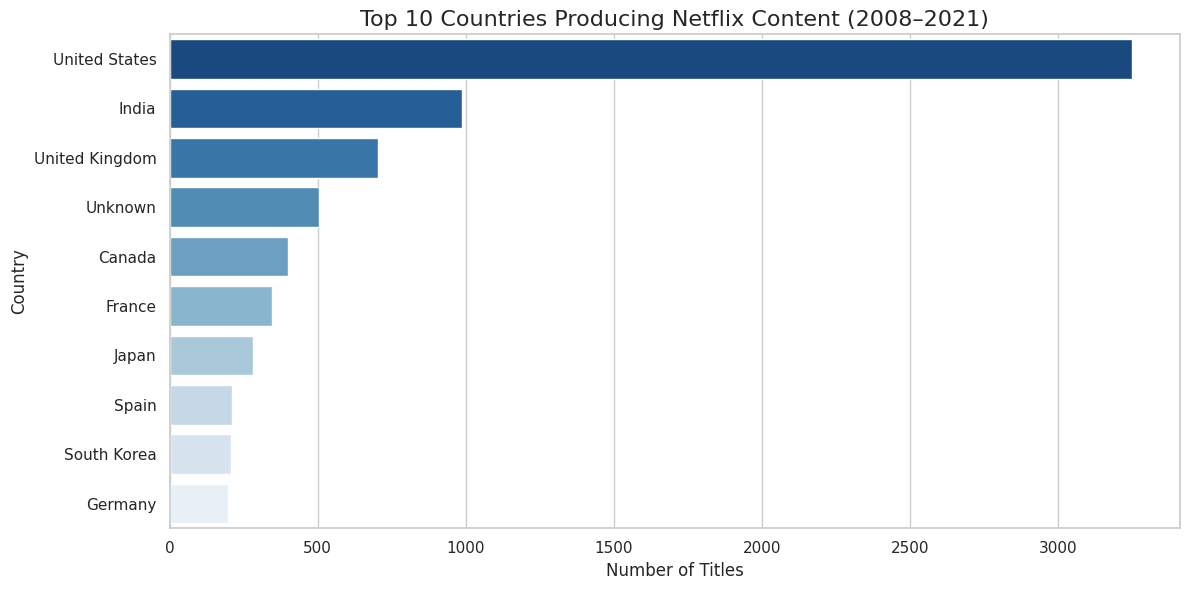

Top 5 Contributing Countries:
1. United States – 3250 titles
2. India – 989 titles
3. United Kingdom – 703 titles
4. Unknown – 503 titles
5. Canada – 399 titles


In [6]:
# Split countries into separate rows
netflix['country_list'] = netflix['Country'].str.split(', ')
country_df = netflix.explode('country_list')
country_df['country_list'] = country_df['country_list'].str.strip()

# Get top 10 countries
top_countries = country_df['country_list'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')
plt.title('Top 10 Countries Producing Netflix Content (2008–2021)', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Print top countries
print("Top 5 Contributing Countries:")
for i, (country, count) in enumerate(top_countries.head().items(), 1):
    print(f"{i}. {country} – {count} titles")

## 💡 Step 7: Strategic Insights & Recommendations

Based on the analysis, we derive **actionable recommendations** aligned with the problem statement. These insights help Netflix:
- Optimize content budgets
- Strengthen global subscriber growth
- Maintain competitive advantage

> 🎯 This fulfills the fourth and final objective: **strategic recommendations**.

In [7]:
print("✅ STRATEGIC INSIGHTS & RECOMMENDATIONS\n")

print("1. 📺 Format Strategy:")
print("   - TV Shows show strong growth post-2015, indicating subscriber preference for serialized content.")
print("   → Recommendation: Prioritize multi-season TV Shows with global appeal.\n")

print("2. 🎭 Genre Strategy:")
print("   - 'International Movies', 'Dramas', and 'Docuseries' dominate the catalog.")
print("   → Recommendation: Invest in high-engagement genres like Docuseries and localized Dramas.\n")

print("3. 🌐 Global Content Expansion:")
print("   - Strong output from India, UK, Japan, and South Korea.")
print("   → Recommendation: Partner with creators in underrepresented regions (e.g., Africa, LATAM, Middle East).\n")

print("4. 📊 Data-Driven Acquisition:")
print("   - Use genre-country patterns (e.g., 'Anime' from Japan, 'Crime TV' from US) to guide licensing.")
print("   → Recommendation: Build regional content teams to identify local hits early.")

✅ STRATEGIC INSIGHTS & RECOMMENDATIONS

1. 📺 Format Strategy:
   - TV Shows show strong growth post-2015, indicating subscriber preference for serialized content.
   → Recommendation: Prioritize multi-season TV Shows with global appeal.

2. 🎭 Genre Strategy:
   - 'International Movies', 'Dramas', and 'Docuseries' dominate the catalog.
   → Recommendation: Invest in high-engagement genres like Docuseries and localized Dramas.

3. 🌐 Global Content Expansion:
   - Strong output from India, UK, Japan, and South Korea.
   → Recommendation: Partner with creators in underrepresented regions (e.g., Africa, LATAM, Middle East).

4. 📊 Data-Driven Acquisition:
   - Use genre-country patterns (e.g., 'Anime' from Japan, 'Crime TV' from US) to guide licensing.
   → Recommendation: Build regional content teams to identify local hits early.


## 🏁 Conclusion

This analysis confirms that Netflix’s content strategy has evolved significantly from **2008 to 2021**:
- A clear shift toward **TV Shows**
- Dominance of **Dramas and International content**
- Heavy reliance on **U.S., India, and East Asian markets**

By leveraging these trends, Netflix can:
- Optimize content budgets  
- Strengthen global subscriber growth  
- Maintain competitive advantage in the streaming wars